# University of Houston REU 2021
Undergraduate Researchers - Daisy Gomez, Michelle Tran, Artin Seifzadeh

Principal Investigator - Dr. Gabriela Jaramillo

# Introduction

We are interested in studying the dynamics of spiral waves and how we can control them. Spiral waves are particular patterns that form in oscillatory media that rotate outwards from a center point. Some examples of where they occur include chemical reactions, such as the Belousov-Zhabotinksy reaction, heart tissue, brain tissue. These different systems can be classified as Oscillatory Media, any system that consists of small oscillators and has some form of coupling between them. 

We are, in particular, interested in heart tissue and heart conditions, such as Tachycardia and Cardiac Fibrillation. We know that spiral waves are present in Tachycardia, but the break-up of these spiral waves leads to Cardiac Fibrillation. Our question is how we can control these spiral waves in order to cause a drift so that they can move towards a certain boundary, and therefore, prevent Tachycardia and Cardiac Fibrillation. This boundary around the spiral is a circular domain. 

Since all oscillatory media behaves the same, we will base our research on chemical reactions in order to gain insights on the same behavior from the heart. In chemical reactions, feedback mechanisms can be used to control the spiral waves. We will analyze the strength of feedback (chemical) present in the circular domain and see how it changes with larger domains by calculating the arc length of the spiral within each circle of increasing radius. In order to do so, we need to find the intersection points of the spiral and the circle. Below, we explain the process of calculating arc length.

# Finding roots and arc length functions

Let $M = (0,0)$ be the center of the circle and $N = (x,y)$ be the core of the spiral such that the distance $d = \sqrt{x^2+y^2} = |M-N|$ is the distance between the spiral's core and the center of the circlular domain. Also, let $P = (x_p, y_p) = (r, \theta)$ be the intersection of the spiral with the circle. It is important to note that we are working with rotating spiral waves, so our equation for $r$ will include a frequency $\omega$, $$r = -\frac{\lambda}{2\pi}\theta + \frac{\lambda}{2\pi}\omega t.$$ We can also write $$\theta = -\frac{2\pi r}{\lambda} + \omega t. $$ In the cartesian coordinate system, we then have $x_p = x + r \cos(\theta)$ and $y_p = y + r \sin(\theta)$, which then gives us $$x_p^2 + y_p^2 = R^2,$$ where $R$ is the radius of the circle.

After some manipulation of this equation, we find that it is $$R^2 = d^2 + r^2 + 2rd\cos\left(\alpha -\omega t + \frac{2\pi}{\lambda}r\right).$$ To find the roots, $r$ (i.e., the intersection points), we solve the nonlinear equation $$F(r) = d^2 + r^2 + 2rd\cos\left(\alpha -\omega t + \frac{2\pi}{\lambda}r\right) - R^2.$$ 


Importing resources

In [1]:
import scipy
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import pprint
from sympy import *
from sympy.plotting import plot
import pandas as pd 
plt.style.use(['bmh'])

## Defining the functions we will use

Function to store intersection points in a dictionary. 

$\bf{Note}$ that we will be converting our r values to theta values in order to calculate arc length

In [2]:
def dictionary(roots_to_clean):
    repeat = 0
    sorted_roots = {}
    tolerance = 0.001
    roots = []
    for i in range(len(roots_to_clean)):
        counter = 0 
        time_boundaries = {'time': t[i]}
        clean = []
        roots_to_clean[i] = sorted(roots_to_clean[i])
        for j in range(len(roots_to_clean[i])):
            if roots_to_clean[i][j] > 0:
                counter += 1
            single_root = (2*np.pi*(roots_to_clean[i][j]))/l # convert to theta values
            #single_root = roots_to_clean[i][j] # keep as r values
            if abs(single_root - repeat) > tolerance and single_root > 0:
                clean.append(single_root)
                repeat = single_root   
        clean.insert(0,0)

        roots.append(clean)
        time_boundaries['boundaries'] = clean
        sorted_roots[i] = time_boundaries
    return sorted_roots

Calcluate the arclength of the spiral within the circle. We then store the arc length values in the dictionary from before.

In [3]:
def arc_length_integrand(theta, dx = 0.01):
    r = lambda theta: (1/(2*np.pi)) * (theta)
    r_prime = (1/(2*np.pi)) 
    integrand = np.sqrt(r_prime**2 + (r(theta)**2))
    return integrand

# Extract Roots and Calculate the ArcLength

def boundaries_at_time_t(time_boundaries, first_boundary = 0):
    """
    variable: inner_dictionary entry
    # inner_dictionary entries have form 
    # 'time' : float
    # 'boundaries' : list of odd length, already sorted 
    # Add initial boundary to list of boundaries
    # Calculate arclength for each set of boundary limits
    """
    # get data from dictionary entry
    boundary_list = time_boundaries['boundaries']
    
    # make for loop over sets of boundaries
    arc_length = 0
    for i in range(int(len(boundary_list)/2)):
        a = boundary_list[i*2]
        b = boundary_list[i*2 + 1]
        wt = time_boundaries['time']
        arc_length += scipy.integrate.quad(arc_length_integrand, a, b)[0]
        
    # add arc_length entry to dictionary entry
    time_boundaries['arc length'] = arc_length
    return time_boundaries

def store_arclength(sorted_roots):
    for i in sorted_roots:
        sorted_roots[i] = boundaries_at_time_t(sorted_roots[i])
    return sorted_roots

# Solving the function for different radii

Here we begin the solving process for our nonlinear equation. Listed below are the various parameters of $F(r)$. We fix all parameters except for radius, $R$. We will be solving for the roots (intersection points), $r$, for a fixed time interval from $t = 0$ to $t = 10\pi$.

In [4]:
# core of the spiral
x, y = 0.3, 0.3

# distance between spiral's core and the center of the circle
d = np.sqrt((x)**2 + (y)**2)

# angle between x axis and spiral's core
a = np.arctan(y/x)

# spiral parameters
w = 1 
l = 1 

# fixed time interval
t = np.linspace(0,10*np.pi, num = 300)

# radius of the cirle
R = np.linspace(2.5,7,10)

# equation we are solving 
f = lambda r: d**2 +(r)**2 +2*(r)*d*np.cos(a-w*time+((2*np.pi)/l)*(r)) - RR**2

We need to make sure we have the right initial guesses for all radii. Because the choice of initial guess is very sensitive, we manually choose initial guesses and solve $F(r)$ for each radii between $2.5$ and $7$ (with increments of 0.5). Fsolve is used. Note that fsolve can tell us whether it converged for each radius and each time for a certain inital guess. If it DID converge, then we store that r value and move on to the next time. If it DIDN'T, we must further refine our intial guess.

Future work involves finding a more efficient way to automate this root finding method for various changing parameters.

# Radius = 2.5

In [5]:
RR = R[0]

''' RIGHT ROOT '''
r_root0 = np.zeros_like(t)
rr0 = RR + 0.5
for i in range(len(t)):
    time = t[i]
    output_r = scipy.optimize.fsolve(f, rr0, full_output = 1)
    if output_r[2] == 1:
        r_root0[i] = output_r[0]
        rr0 = output_r[0]
    else:
        r_root0[i]=0
        rr0 = 0.6

''' MIDDLE ROOT '''
m_root0 = np.zeros_like(t)
mr0 = RR - 0.1
for i in range(len(t)):
    time = t[i]
    output_m = scipy.optimize.fsolve(f, mr0, full_output = 1, xtol = 1e-5)
    if output_m[2] == 1:
        if abs(output_m[0] - r_root0[i]) < 0.01:
            m_root0[i] = 0 
            mr0 = RR - 0.5 #2.1
        
        elif output_m[0] < 0:
            m_root0[i] = 0
            mr0 = RR -0.5 #2.1
        else:
            m_root0[i] = output_m[0]
            mr0 = output_m[0] + 0.1
    else:
        m_root0[i] = 0
        mr0 = RR-0.5 #2.1
          
''' LEFT ROOT '''
l_root0 = np.zeros_like(t)
lr0 = RR - 1  # 1
for i in range(len(t)):
    time = t[i]
    output_l = scipy.optimize.fsolve(f, lr0, full_output = 1)
    if output_l[2]==1:
        
        if abs(output_l[0] - m_root0[i]) < 0.01:
            l_root0[i] = 0
            lr0 = RR - 1 # 1
        elif abs(output_l[0] - r_root0[i]) < 0.01:
            l_root0[i] =0
            lr0 = RR - 1 #1
        elif output_l[0] <0:
            l_root0[i] =0
            lr0 = RR -1 #1
        else:
            l_root0[i]= output_l[0]
            lr0 = output_l[0]-0.1
    else:
        l_root0[i] = 0
        lr0 = RR -1  #1
roots0 = [[l_root0, m_root0, r_root0] for l_root0, m_root0, r_root0 in zip(l_root0, m_root0, r_root0)]

## Uncomment to display roots and time
# for i in range(len(t)):
#     print(roots0[i], 'time = ', t[i], '\n')

# Radius = 3

In [6]:
RR = R[1]

''' RIGHT ROOT '''
r_root1 = np.zeros_like(t)
rr1 = RR + 0.5
for i in range(len(t)):
    time = t[i]
    output_r = scipy.optimize.fsolve(f, rr1, full_output = 1)
    if output_r[2] == 1:
        r_root1[i] = output_r[0]
        rr1 = output_r[0]
    else:
        r_root1[i]=0
        rr1 = 0.6

''' MIDDLE ROOT '''
m_root1 = np.zeros_like(t)
mr1 = RR - 0.1
for i in range(len(t)):
    time = t[i]
    output_m = scipy.optimize.fsolve(f, mr1, full_output = 1, xtol = 1e-5)
    if output_m[2] == 1:
        if abs(output_m[0] - r_root1[i]) < 0.01:
            m_root1[i] = 0 
            mr1 = RR - 0.5 #2.1
        
        elif output_m[0] < 0:
            m_root1[i] = 0
            mr1 = RR -0.5 #2.1
        else:
            m_root1[i] = output_m[0]
            mr1 = output_m[0] + 0.1
    else:
        m_root1[i] = 0
        mr1 = RR-0.5 #2.1
          
''' LEFT ROOT '''
l_root1 = np.zeros_like(t)
lr1 = RR - 1  # 1
for i in range(len(t)):
    time = t[i]
    output_l = scipy.optimize.fsolve(f, lr1, full_output = 1)
    if output_l[2]==1:
        
        if abs(output_l[0] - m_root1[i]) < 0.01:
            l_root1[i] = 0
            lr1 = RR - 1 # 1
        elif abs(output_l[0] - r_root1[i]) < 0.01:
            l_root1[i] =0
            lr1 = RR - 1 #1
        elif output_l[0] <0:
            l_root1[i] =0
            lr1 = RR -1 #1
        else:
            l_root1[i]= output_l[0]
            lr1 = output_l[0]-0.1
    else:
        l_root1[i] = 0
        lr1 = RR - 0.5  #1
          
roots1 = [[l_root1, m_root1, r_root1] for l_root1, m_root1, r_root1 in zip(l_root1, m_root1, r_root1)]

# Radius = 3.5

In [7]:
RR = R[2]

''' RIGHT ROOT '''
r_root2 = np.zeros_like(t)
rr2 = RR + 0.5
for i in range(len(t)):
    time = t[i]
    output_r = scipy.optimize.fsolve(f, rr2, full_output = 1)
    if output_r[2] == 1:
        r_root2[i] = output_r[0]
        rr2 = output_r[0]
    else:
        r_root2[i]=0
        rr2 = 0.6

''' MIDDLE ROOT '''
m_root2 = np.zeros_like(t)
mr2 = RR - 0.1
for i in range(len(t)):
    time = t[i]
    output_m = scipy.optimize.fsolve(f, mr2, full_output = 1, xtol = 1e-5)
    if output_m[2] == 1:
        if abs(output_m[0] - r_root2[i]) < 0.01:
            m_root2[i] = 0 
            mr2 = RR - 0.5 #2.1
        
        elif output_m[0] < 0:
            m_root2[i] = 0
            mr2 = RR -0.5 #2.1
        else:
            m_root2[i] = output_m[0]
            mr2 = output_m[0] + 0.1
    else:
        m_root2[i] = 0
        mr2 = RR-0.5 #2.1
          
''' LEFT ROOT '''
l_root2 = np.zeros_like(t)
lr2 = RR - 1  # 1
for i in range(len(t)):
    time = t[i]
    output_l = scipy.optimize.fsolve(f, lr2, full_output = 1)
    if output_l[2]==1:
        if abs(output_l[0] - m_root2[i]) < 0.01:
            l_root2[i] = 0
            lr2 = RR - 1 # 1
        elif abs(output_l[0] - r_root2[i]) < 0.01:
            l_root2[i] =0
            lr2 = RR - 1 #1
        elif output_l[0] <0:
            l_root2[i] =0
            lr2 = RR -1 #1
        else:
            l_root2[i]= output_l[0]
            lr2 = output_l[0]-0.1
    else:
        l_root2[i] = 0
        lr2 = RR - 0.5  #1
          
roots2 = [[l_root2, m_root2, r_root2] for l_root2, m_root2, r_root2 in zip(l_root2, m_root2, r_root2)]

# Radius = 4

In [8]:
RR = R[3]

''' RIGHT ROOT '''
r_root3 = np.zeros_like(t)
rr3 = RR + 0.5
for i in range(len(t)):
    time = t[i]
    output_r = scipy.optimize.fsolve(f, rr3, full_output = 1)
    if output_r[2] == 1:
        r_root3[i] = output_r[0]
        rr3 = output_r[0]
    else:
        r_root3[i]=0
        rr3 = 0.6

''' MIDDLE ROOT '''
m_root3 = np.zeros_like(t)
mr3 = RR - 0.1
for i in range(len(t)):
    time = t[i]
    output_m = scipy.optimize.fsolve(f, mr3, full_output = 1, xtol = 1e-5)
    if output_m[2] == 1:
        if abs(output_m[0] - r_root3[i]) < 0.01:
            m_root3[i] = 0 
            mr3 = RR - 0.5 #2.1
        
        elif output_m[0] < 0:
            m_root3[i] = 0
            mr3 = RR -0.5 #2.1
        else:
            m_root3[i] = output_m[0]
            mr3 = output_m[0] + 0.1
    else:
        m_root3[i] = 0
        mr3 = RR-0.5 #2.1
          
''' LEFT ROOT '''
l_root3 = np.zeros_like(t)
lr3 = RR - 1  # 1
for i in range(len(t)):
    time = t[i]
    output_l = scipy.optimize.fsolve(f, lr3, full_output = 1)
    if output_l[2]==1:
        if abs(output_l[0] - m_root3[i]) < 0.01:
            l_root3[i] = 0
            lr3 = RR - 1 # 1
        elif abs(output_l[0] - r_root3[i]) < 0.01:
            l_root3[i] =0
            lr3 = RR - 1 #1
        elif output_l[0] <0:
            l_root3[i] =0
            lr3 = RR -1 #1
        else:
            l_root3[i]= output_l[0]
            lr3 = output_l[0]-0.1
    else:
        l_root3[i] = 0
        lr3 = RR - 0.5  #1
          
roots3 = [[l_root3, m_root3, r_root3] for l_root3, m_root3, r_root3 in zip(l_root3, m_root3, r_root3)]

# Radius = 4.5

In [9]:
RR = R[4]

''' RIGHT ROOT '''
r_root4 = np.zeros_like(t)
rr4 = RR + 0.5
for i in range(len(t)):
    time = t[i]
    output_r = scipy.optimize.fsolve(f, rr4, full_output = 1)
    if output_r[2] == 1:
        r_root4[i] = output_r[0]
        rr4 = output_r[0]
    else:
        r_root4[i]=0
        rr4 = 0.6

''' MIDDLE ROOT '''
m_root4 = np.zeros_like(t)
mr4 = RR - 0.1
for i in range(len(t)):
    time = t[i]
    output_m = scipy.optimize.fsolve(f, mr4, full_output = 1, xtol = 1e-5)
    if output_m[2] == 1:
        if abs(output_m[0] - r_root4[i]) < 0.01:
            m_root4[i] = 0 
            mr4 = RR - 0.5 #2.1
        
        elif output_m[0] < 0:
            m_root4[i] = 0
            mr4 = RR -0.5 #2.1
        else:
            m_root4[i] = output_m[0]
            mr4 = output_m[0] + 0.1
    else:
        m_root4[i] = 0
        mr4 = RR-0.5 #2.1
          
''' LEFT ROOT '''
l_root4 = np.zeros_like(t)
lr4 = RR - 1  # 1
for i in range(len(t)):
    time = t[i]
    output_l = scipy.optimize.fsolve(f, lr4, full_output = 1)
    if output_l[2]==1:
        if abs(output_l[0] - m_root4[i]) < 0.01:
            l_root4[i] = 0
            lr4 = RR - 1 # 1
        elif abs(output_l[0] - r_root4[i]) < 0.01:
            l_root4[i] =0
            lr4 = RR - 1 #1
        elif output_l[0] <0:
            l_root4[i] =0
            lr4 = RR -1 #1
        else:
            l_root4[i]= output_l[0]
            lr4 = output_l[0]-0.1
    else:
        l_root4[i] = 0
        lr4 = RR - 0.5  #1
          
roots4 = [[l_root4, m_root4, r_root4] for l_root4, m_root4, r_root4 in zip(l_root4, m_root4, r_root4)]

# Radius = 5

In [10]:
RR = R[5]

''' RIGHT ROOT '''
r_root5 = np.zeros_like(t)
rr5 = RR + 0.5
for i in range(len(t)):
    time = t[i]
    output_r = scipy.optimize.fsolve(f, rr5, full_output = 1)
    if output_r[2] == 1:
        r_root5[i] = output_r[0]
        rr5 = output_r[0]
    else:
        r_root5[i]=0
        rr5 = 0.6

''' MIDDLE ROOT '''
m_root5 = np.zeros_like(t)
mr5 = RR - 0.1
for i in range(len(t)):
    time = t[i]
    output_m = scipy.optimize.fsolve(f, mr5, full_output = 1, xtol = 1e-5)
    if output_m[2] == 1:
        if abs(output_m[0] - r_root5[i]) < 0.01:
            m_root5[i] = 0 
            mr5 = RR - 0.5 #2.1
        
        elif output_m[0] < 0:
            m_root5[i] = 0
            mr5 = RR -0.5 #2.1
        else:
            m_root5[i] = output_m[0]
            mr5 = output_m[0] + 0.1
    else:
        m_root5[i] = 0
        mr5 = RR-0.5 #2.1
          
''' LEFT ROOT '''
l_root5 = np.zeros_like(t)
lr5 = RR - 1  # 1
for i in range(len(t)):
    time = t[i]
    output_l = scipy.optimize.fsolve(f, lr5, full_output = 1)
    if output_l[2]==1:
        if abs(output_l[0] - m_root5[i]) < 0.01:
            l_root5[i] = 0
            lr5 = RR - 1 # 1
        elif abs(output_l[0] - r_root5[i]) < 0.01:
            l_root5[i] =0
            lr5 = RR - 1 #1
        elif output_l[0] <0:
            l_root5[i] =0
            lr5 = RR -1 #1
        else:
            l_root5[i]= output_l[0]
            lr5 = output_l[0]-0.1
    else:
        l_root5[i] = 0
        lr5 = RR - 0.5  #1
          
roots5 = [[l_root5, m_root5, r_root5] for l_root5, m_root5, r_root5 in zip(l_root5, m_root5, r_root5)]


# Radius = 5.5

In [11]:
RR = R[6]

''' RIGHT ROOT '''
r_root6 = np.zeros_like(t)
rr6 = RR + 0.5
for i in range(len(t)):
    time = t[i]
    output_r = scipy.optimize.fsolve(f, rr6, full_output = 1)
    if output_r[2] == 1:
        r_root6[i] = output_r[0]
        rr6 = output_r[0]
    else:
        r_root6[i]=0
        rr6 = 0.6

''' MIDDLE ROOT '''
m_root6 = np.zeros_like(t)
mr6 = RR - 0.1
for i in range(len(t)):
    time = t[i]
    output_m = scipy.optimize.fsolve(f, mr6, full_output = 1, xtol = 1e-5)
    if output_m[2] == 1:
        if abs(output_m[0] - r_root6[i]) < 0.01:
            m_root6[i] = 0 
            mr6 = RR - 0.5 #2.1
        
        elif output_m[0] < 0:
            m_root6[i] = 0
            mr6 = RR -0.5 #2.1
        else:
            m_root6[i] = output_m[0]
            mr6 = output_m[0] + 0.1
    else:
        m_root6[i] = 0
        mr6 = RR-0.5 #2.1
          
''' LEFT ROOT '''
l_root6 = np.zeros_like(t)
lr6 = RR - 1  # 1
for i in range(len(t)):
    time = t[i]
    output_l = scipy.optimize.fsolve(f, lr6, full_output = 1)
    if output_l[2]==1:
        if abs(output_l[0] - m_root6[i]) < 0.01:
            l_root6[i] = 0
            lr6 = RR - 1 # 1
        elif abs(output_l[0] - r_root6[i]) < 0.01:
            l_root6[i] =0
            lr6 = RR - 1 #1
        elif output_l[0] <0:
            l_root6[i] =0
            lr6 = RR -1 #1
        else:
            l_root6[i]= output_l[0]
            lr6 = output_l[0]-0.1
    else:
        l_root6[i] = 0
        lr6 = RR - 0.5  #1
          
roots6 = [[l_root6, m_root6, r_root6] for l_root6, m_root6, r_root6 in zip(l_root6, m_root6, r_root6)]

# Radius = 6

In [12]:
RR = R[7]

''' RIGHT ROOT '''
r_root7 = np.zeros_like(t)
rr7 = RR + 0.5
for i in range(len(t)):
    time = t[i]
    output_r = scipy.optimize.fsolve(f, rr7, full_output = 1)
    if output_r[2] == 1:
        r_root7[i] = output_r[0]
        rr7 = output_r[0]
    else:
        r_root7[i]=0
        rr7 = 0.6

''' MIDDLE ROOT '''
m_root7 = np.zeros_like(t)
mr7 = RR - 0.1
for i in range(len(t)):
    time = t[i]
    output_m = scipy.optimize.fsolve(f, mr7, full_output = 1, xtol = 1e-5)
    if output_m[2] == 1:
        if abs(output_m[0] - r_root7[i]) < 0.01:
            m_root7[i] = 0 
            mr7 = RR - 0.5 #2.1
        
        elif output_m[0] < 0:
            m_root7[i] = 0
            mr7 = RR -0.5 #2.1
        else:
            m_root7[i] = output_m[0]
            mr7 = output_m[0] + 0.1
    else:
        m_root7[i] = 0
        mr7 = RR-0.5 #2.1
          
''' LEFT ROOT '''
l_root7 = np.zeros_like(t)
lr7 = RR - 1  # 1
for i in range(len(t)):
    time = t[i]
    output_l = scipy.optimize.fsolve(f, lr7, full_output = 1)
    if output_l[2]==1:
        if abs(output_l[0] - m_root7[i]) < 0.01:
            l_root7[i] = 0
            lr7 = RR - 1 # 1
        elif abs(output_l[0] - r_root7[i]) < 0.01:
            l_root7[i] =0
            lr7 = RR - 1 #1
        elif output_l[0] <0:
            l_root7[i] =0
            lr7 = RR -1 #1
        else:
            l_root7[i]= output_l[0]
            lr7 = output_l[0]-0.1
    else:
        l_root7[i] = 0
        lr7 = RR - 0.5  #1
          
roots7 = [[l_root7, m_root7, r_root7] for l_root7, m_root7, r_root7 in zip(l_root7, m_root7, r_root7)]

# Radius = 6.5

In [13]:
RR = R[8]

''' RIGHT ROOT '''
r_root8 = np.zeros_like(t)
rr8 = RR + 0.5
for i in range(len(t)):
    time = t[i]
    output_r = scipy.optimize.fsolve(f, rr8, full_output = 1)
    if output_r[2] == 1:
        r_root8[i] = output_r[0]
        rr8 = output_r[0]
    else:
        r_root8[i]=0
        rr8 = 0.6

''' MIDDLE ROOT '''
m_root8 = np.zeros_like(t)
mr8 = RR - 0.1
for i in range(len(t)):
    time = t[i]
    output_m = scipy.optimize.fsolve(f, mr8, full_output = 1, xtol = 1e-5)
    if output_m[2] == 1:
        if abs(output_m[0] - r_root8[i]) < 0.01:
            m_root8[i] = 0 
            mr8 = RR - 0.5 #2.1
        
        elif output_m[0] < 0:
            m_root8[i] = 0
            mr8 = RR -0.5 #2.1
        else:
            m_root8[i] = output_m[0]
            mr8 = output_m[0] + 0.1
    else:
        m_root8[i] = 0
        mr8 = RR-0.5 #2.1
          
''' LEFT ROOT '''
l_root8 = np.zeros_like(t)
lr8 = RR - 1  # 1
for i in range(len(t)):
    time = t[i]
    output_l = scipy.optimize.fsolve(f, lr8, full_output = 1)
    if output_l[2]==1:
        if abs(output_l[0] - m_root8[i]) < 0.01:
            l_root8[i] = 0
            lr8 = RR - 1 # 1
        elif abs(output_l[0] - r_root8[i]) < 0.01:
            l_root8[i] =0
            lr8 = RR - 1 #1
        elif output_l[0] <0:
            l_root8[i] =0
            lr8 = RR -1 #1
        else:
            l_root8[i]= output_l[0]
            lr8 = output_l[0]-0.1
    else:
        l_root8[i] = 0
        lr8 = RR - 0.5  #1
          
roots8 = [[l_root8, m_root8, r_root8] for l_root8, m_root8, r_root8 in zip(l_root8, m_root8, r_root8)]

# Radius = 7

In [14]:
RR = R[9]

''' RIGHT ROOT '''
r_root9 = np.zeros_like(t)
rr9 = RR + 0.5
for i in range(len(t)):
    time = t[i]
    output_r = scipy.optimize.fsolve(f, rr9, full_output = 1)
    if output_r[2] == 1:
        r_root9[i] = output_r[0]
        rr9 = output_r[0]
    else:
        r_root9[i]=0
        rr9 = 0.6

''' MIDDLE ROOT '''
m_root9 = np.zeros_like(t)
mr9 = RR - 0.1
for i in range(len(t)):
    time = t[i]
    output_m = scipy.optimize.fsolve(f, mr9, full_output = 1, xtol = 1e-5)
    if output_m[2] == 1:
        if abs(output_m[0] - r_root9[i]) < 0.01:
            m_root9[i] = 0 
            mr9 = RR - 0.5 #2.1
        
        elif output_m[0] < 0:
            m_root9[i] = 0
            mr9 = RR -0.5 #2.1
        else:
            m_root9[i] = output_m[0]
            mr9 = output_m[0] + 0.1
    else:
        m_root9[i] = 0
        mr9 = RR-0.5 #2.1
          
''' LEFT ROOT '''
l_root9 = np.zeros_like(t)
lr9 = RR - 1  # 1
for i in range(len(t)):
    time = t[i]
    output_l = scipy.optimize.fsolve(f, lr9, full_output = 1)
    if output_l[2]==1:
        if abs(output_l[0] - m_root9[i]) < 0.01:
            l_root9[i] = 0
            lr9 = RR - 1 # 1
        elif abs(output_l[0] - r_root9[i]) < 0.01:
            l_root9[i] =0
            lr9 = RR - 1 #1
        elif output_l[0] <0:
            l_root9[i] =0
            lr9 = RR -1 #1
        else:
            l_root9[i]= output_l[0]
            lr9 = output_l[0]-0.1
    else:
        l_root9[i] = 0
        lr9 = RR - 0.5  #1
          
roots9 = [[l_root9, m_root9, r_root9] for l_root9, m_root9, r_root9 in zip(l_root9, m_root9, r_root9)]

# Place roots in dictionaries and data frames: plot & analyze

Store roots in separate dictionaries for each radii

In [15]:
R1 = dictionary(roots0)
R2 = dictionary(roots1)
R3 = dictionary(roots2)
R4 = dictionary(roots3)
R5 = dictionary(roots4)
R6 = dictionary(roots5)
R7 = dictionary(roots6)
R8 = dictionary(roots7)
R9 = dictionary(roots8)
R10 = dictionary(roots9)

Calculate the arclength of the spiral and store the arc length values in the dictionary for which it belongs

In [16]:
sorted_R1 = store_arclength(R1)
sorted_R2 = store_arclength(R2)
sorted_R3 = store_arclength(R3)
sorted_R4 = store_arclength(R4)
sorted_R5 = store_arclength(R5)
sorted_R6 = store_arclength(R6)
sorted_R7 = store_arclength(R7)
sorted_R8 = store_arclength(R8)
sorted_R9 = store_arclength(R9)
sorted_R10 = store_arclength(R10)

Convert to dataframes for ease of analysis and plotting.

In [17]:
df0 = pd.DataFrame.from_dict(sorted_R1)
df0 = pd.DataFrame.transpose(df0)
pd.set_option('max_colwidth', 500)
pd.set_option('display.max_rows', 400)

df1 = pd.DataFrame.from_dict(sorted_R2)
df1 = pd.DataFrame.transpose(df1)
pd.set_option('max_colwidth', 500)
pd.set_option('display.max_rows', 400)

df2 = pd.DataFrame.from_dict(sorted_R3)
df2 = pd.DataFrame.transpose(df2)
pd.set_option('max_colwidth', 500)
pd.set_option('display.max_rows', 400)

df3 = pd.DataFrame.from_dict(sorted_R4)
df3 = pd.DataFrame.transpose(df3)
pd.set_option('max_colwidth', 500)
pd.set_option('display.max_rows', 400)

df4 = pd.DataFrame.from_dict(sorted_R5)
df4 = pd.DataFrame.transpose(df4)
pd.set_option('max_colwidth', 500)
pd.set_option('display.max_rows', 400)

df5 = pd.DataFrame.from_dict(sorted_R6)
df5 = pd.DataFrame.transpose(df5)
pd.set_option('max_colwidth', 500)
pd.set_option('display.max_rows', 400)

df6 = pd.DataFrame.from_dict(sorted_R7)
df6 = pd.DataFrame.transpose(df6)
pd.set_option('max_colwidth', 500)
pd.set_option('display.max_rows', 400)

df7 = pd.DataFrame.from_dict(sorted_R8)
df7 = pd.DataFrame.transpose(df7)
pd.set_option('max_colwidth', 500)
pd.set_option('display.max_rows', 400)

df8 = pd.DataFrame.from_dict(sorted_R9)
df8 = pd.DataFrame.transpose(df8)
pd.set_option('max_colwidth', 500)
pd.set_option('display.max_rows', 400)

df9 = pd.DataFrame.from_dict(sorted_R10)
df9 = pd.DataFrame.transpose(df9)
pd.set_option('max_colwidth', 500)
pd.set_option('display.max_rows', 400)

In [18]:
''' CODE TO DOWNLOAD DATA AS CSV FILES IF NEEDED '''
# df0.to_csv('R1.csv')
# df1.to_csv('R2.csv')
# df2.to_csv('R3.csv')
# df3.to_csv('R4.csv')
# df4.to_csv('R5.csv')
# df5.to_csv('R6.csv')
# df6.to_csv('R7.csv')
# df7.to_csv('R8.csv')
# df8.to_csv('R9.csv')
# df9.to_csv('R10.csv')

' CODE TO DOWNLOAD DATA AS CSV FILES IF NEEDED '

In [19]:
''' CODE TO READ IN CSV FILES IF NEEDED '''
# df0 = pd.read_csv("R1.csv") 
# df1 = pd.read_csv("R2.csv") 
# df2 = pd.read_csv("R3.csv") 
# df3 = pd.read_csv("R4.csv") 
# df4 = pd.read_csv("R5.csv") 
# df5 = pd.read_csv("R6.csv") 
# df6 = pd.read_csv("R7.csv") 
# df7 = pd.read_csv("R8.csv") 
# df8 = pd.read_csv("R9.csv") 
# df9 = pd.read_csv("R10.csv") 

' CODE TO READ IN CSV FILES IF NEEDED '

# Using the arc length data: Finding a sine curve of best fit

Define a function to find the best fitted sine curves for our arclength data. We can then use these fitted curves to analyze the frequency, phase, and amplitude of the arclength data.

In [18]:
def arc_func(t, a, b, c,d):
    return a * np.sin(b * t + c) + d

Create lists to store phase, amplitude and period. We will analyze this later to see if there is a phase shift or change in amplitude, as well as a connection between the period and the frequency of the spiral

In [19]:
phase = []
amplitude = []
period = []

Here, we use scipy.optimize (with initial guesses) to find the various parameters for each fitted sine curve from each data set. Recall, these are for radii 2.5 to 7

In [20]:
from scipy import optimize
x_data = []
y_data = []

x_data0 = np.float32(df0['time'])
yy_data0 = arc_func(x_data0, 3.5, 1, 1, 19.7)
params0, params_covariance0 = optimize.curve_fit(arc_func, x_data0, yy_data0, p0 = [3.5, 1, 1, 19.7])
x_data.append(x_data0)
y_data.append(yy_data0)

x_data1 = np.float32(df1['time'])
yy_data1 = arc_func(x_data1, 4.3, 1, -2.4, 28.4)
params1, params_covariance1 = optimize.curve_fit(arc_func, x_data1, yy_data1, p0 = [4.3, 1, -2.4, 28.4])
x_data.append(x_data1)
y_data.append(yy_data1)

x_data2 = np.float32(df2['time'])
yy_data2 = arc_func(x_data2, 4.9, 1, -5.5, 38.2)
params2, params_covariance2 = optimize.curve_fit(arc_func, x_data2, yy_data2, p0 = [4.9, 1, -5.5, 38.2])
x_data.append(x_data2)
y_data.append(yy_data2)

x_data3 = np.float32(df3['time'])
yy_data3 = arc_func(x_data3, 5.8, 1, -2.2, 50)
params3, params_covariance3 = optimize.curve_fit(arc_func, x_data3, yy_data3, p0 = [5.8, 1, -8.2, 50])
x_data.append(x_data3)
y_data.append(yy_data3)

x_data4 = np.float32(df4['time'])
yy_data4 = arc_func(x_data4, 6.8, 1, -5.5, 63.7)
params4, params_covariance4 = optimize.curve_fit(arc_func, x_data4, yy_data4, p0 = [6.8, 1, -11.5, 63.7])
x_data.append(x_data4)
y_data.append(yy_data4)

x_data5 = np.float32(df5['time'])
yy_data5 = arc_func(x_data5, 7.6, 1, -8.4, 78.6)
params5, params_covariance5 = optimize.curve_fit(arc_func, x_data5, yy_data5, p0 = [7.6, 1, -15.4, 78.6])
x_data.append(x_data5)
y_data.append(yy_data5)

x_data6 = np.float32(df6['time'])
yy_data6 = arc_func(x_data6, 8.3, 1, -11.9, 95)
params6, params_covariance6 = optimize.curve_fit(arc_func, x_data6, yy_data6, p0 = [8.3, 1, -18.9, 95])
x_data.append(x_data6)
y_data.append(yy_data6)

x_data7 = np.float32(df7['time'])
yy_data7 = arc_func(x_data7, 8.6, 1, -15, 112.5)
params7, params_covariance7 = optimize.curve_fit(arc_func, x_data7, yy_data7, p0 = [8.6, 1, -21, 112.5])
x_data.append(x_data7)
y_data.append(yy_data7)

x_data8 = np.float32(df8['time'])
yy_data8 = arc_func(x_data8, 9.6, 1, -18.2, 132.5)
params8, params_covariance8 = optimize.curve_fit(arc_func, x_data8, yy_data8, p0 = [9.6, 1, -24, 132.5])
x_data.append(x_data8)
y_data.append(yy_data8)

x_data9 = np.float32(df9['time'])
yy_data9 = arc_func(x_data9, 10, 1, -21.1, 153)
params9, params_covariance9 = optimize.curve_fit(arc_func, x_data9, yy_data9, p0 = [10, 1, -27.2, 152.9])
x_data.append(x_data9)
y_data.append(yy_data9)

We define a function to plot each data set. The fitted sine function is printed below its pertaining plot.

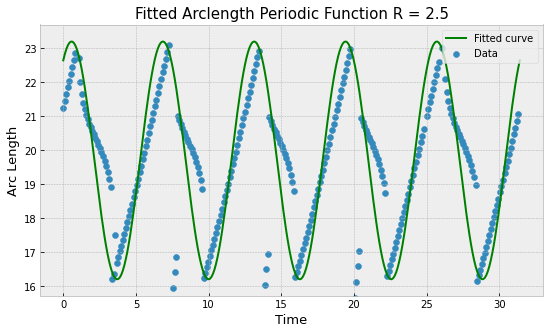

Eq(3.50000008144049*sin(1.00000000226774*t + 0.999999973766916) + 19.70000079131, 0)

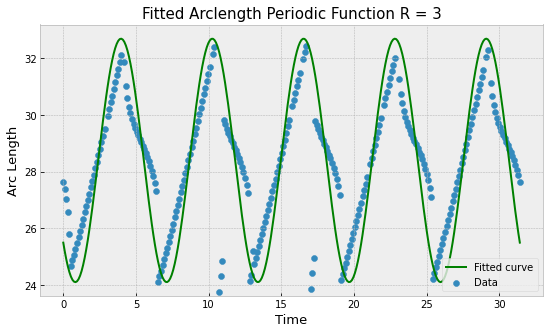

Eq(4.30000019344736*sin(1.00000002388024*t - 2.40000025268216) + 28.3999997108755, 0)

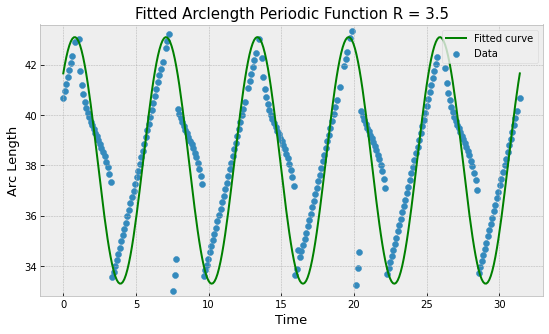

Eq(4.90000006815635*sin(1.00000000341838*t - 5.50000002329413) + 38.200000800488, 0)

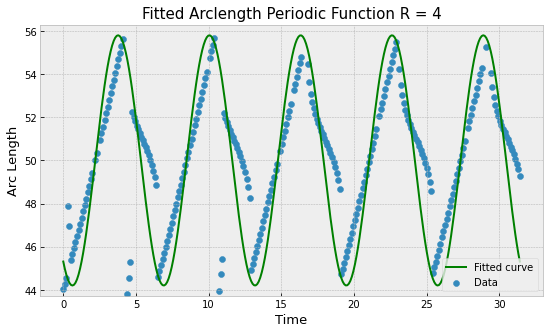

Eq(5.80000009473982*sin(0.999999960258151*t - 8.48318494746) + 49.9999999760603, 0)

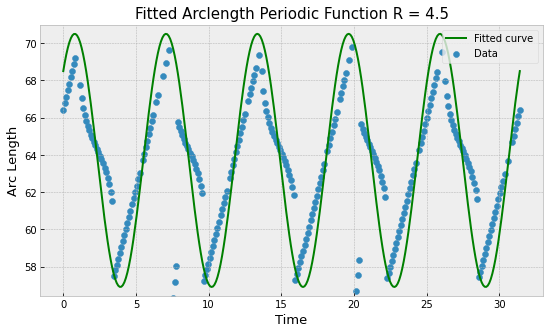

Eq(6.80000020952529*sin(1.00000000300374*t - 11.7831853168132) + 63.7000006975314, 0)

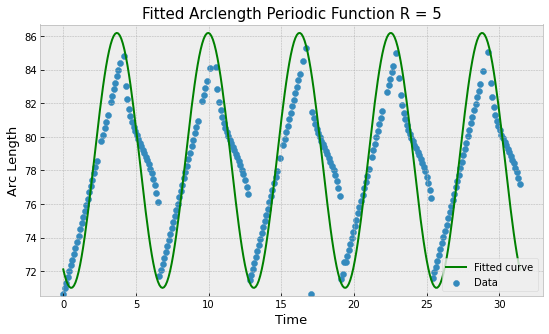

Eq(7.60000006145633*sin(0.999999999838458*t - 14.6831849067777) + 78.599998758719, 0)

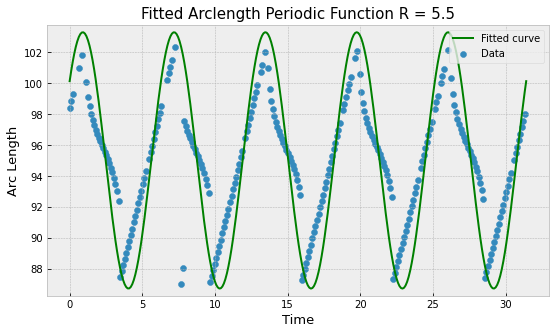

Eq(8.30000024930793*sin(0.999999999596699*t - 18.1831848913696) + 94.9999999795101, 0)

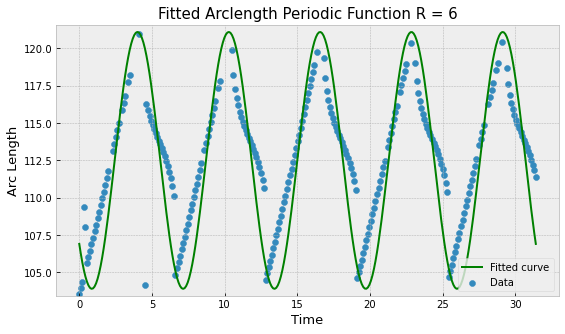

Eq(8.60000044094336*sin(1.00000000149483*t - 21.2831852952593) + 112.499999897252, 0)

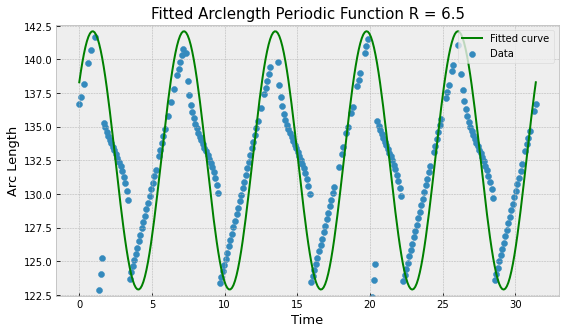

Eq(9.60000012474099*sin(0.999999996487947*t - 24.4831860287999) + 132.500000589293, 0)

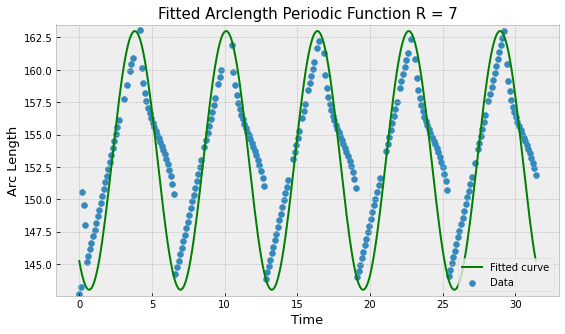

Eq(9.99999991388796*sin(0.99999999451102*t - 27.383185626397) + 153.000000100198, 0)

In [21]:
def plot(r, df, x, y, params):
    
    plt.figure(figsize=(9, 5))
    plt.scatter(df['time'], df['arc length'], label='Data')
    plt.plot(x, arc_func(x, params[0], params[1], params[2], params[3]),label='Fitted curve', color = 'green')
    plt.title('Fitted Arclength Periodic Function R = ' + str(r), fontsize = 15)
    plt.xlabel('Time', fontsize = 13)
    plt.ylabel('Arc Length', fontsize = 13)
    plt.legend(loc='best')
    plt.ylim((params[3] - params[0])-0.5, (params[3] + params[0])+0.5)
    
    # Uncomment line below to save figure 
    # plt.savefig('R = ' + str(r) + '.pdf')
    
    plt.show()
    
    # Display sine function in sympy below its plot/figure
    t = symbols('t')
    eqn = params[0]*sin(params[1]*t + params[2]) + params[3]
    display(Eq(eqn,0))
    
plot(2.5, df0, x_data0, yy_data0, params0)
plot(3, df1, x_data1, yy_data1, params1)
plot(3.5, df2, x_data2, yy_data2, params2)
plot(4, df3, x_data3, yy_data3, params3)
plot(4.5, df4, x_data4, yy_data4, params4)
plot(5, df5, x_data5, yy_data5, params5)
plot(5.5, df6, x_data6, yy_data6, params6)
plot(6, df7, x_data7, yy_data7, params7)
plot(6.5, df8, x_data8, yy_data8, params8)
plot(7, df9, x_data9, yy_data9, params9)

We place our different sets of parameters into a list. Then we extract the phase and amplitude parameters.

In [22]:
p = [params0, params1, params2, params3, params4, params5, params6, params7, params8, params9]

for params in p:
    phase.append(params[2])
    amplitude.append(params[0])
    period.append(params[1])

Plot phase and amplitude data and attempt a polyfit. The data shows that there was a phase shift (negative), and a change in amplitude. So we conclude that as the radius of the circle increases, the fitted sine functions for the spiral's arc length data see a phase shift and an increase in amplitude. We also note that the period remained the same and correlates with the frequency of the rotating spiral

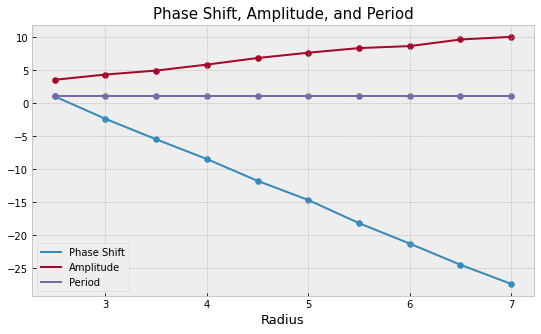

In [23]:
R = np.linspace(2.5, 7, 10)
plt.figure(figsize=(9, 5))
plt.scatter(R, phase)
plt.plot(R, phase)
plt.scatter(R, amplitude)
plt.plot(R, amplitude)
plt.scatter(R, period)
plt.plot(R, period)
plt.legend(['Phase Shift', 'Amplitude', 'Period'])
plt.xlabel('Radius', fontsize = 13)
plt.title('Phase Shift, Amplitude, and Period', fontsize = 15)

# To save this plot, uncomment the line below 
# plt.savefig('p.a.pdf')

phase = np.array(phase)
amplitude = np.array(amplitude)

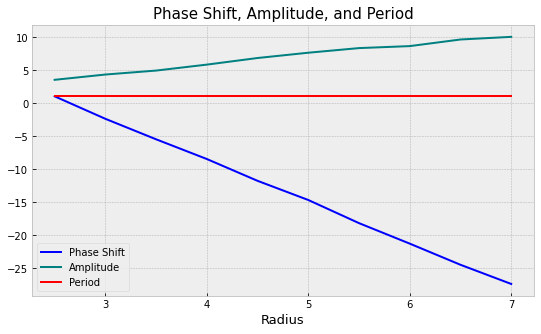

In [26]:
#plt.plot(R, phase,'o')
x = phase
y = amplitude
z = period

a = np.poly1d(np.polyfit(R, x, 9))
b = np.poly1d(np.polyfit(R, y, 9))
c = np.poly1d(np.polyfit(R, z, 9))


# plt.plot(R, phase, 'o', R, a(R), '-', color = 'blue')
# plt.plot(R, amplitude, 'o', R, b(R), '-', color = 'teal')
plt.figure(figsize=(9, 5))
plt.plot(R, a(R), '-', color = 'blue')
plt.plot(R, b(R), '-', color = 'teal')
plt.plot(R, c(R), '-', color = 'red')

plt.legend(['Phase Shift','Amplitude', 'Period'])
plt.xlabel('Radius', fontsize = 13)
plt.title('Phase Shift, Amplitude, and Period', fontsize = 15)

# To save this plot, uncomment the line below 
# plt.savefig('phase,amp.pdf')

plt.show()

Further analysis from the fourier transform below also shows that the frequency (period) of the fitted sine functions (arc length data) have periods that correspond to the frequency of the spiral, $\omega = 1$. So ideally, this results in a spiral drift.

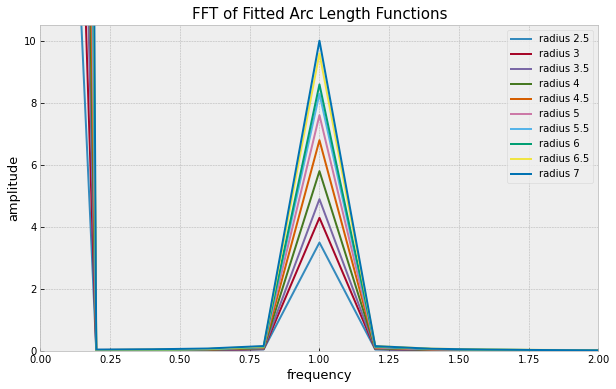

In [24]:
from scipy.fft import fft, fftfreq

# Number of sample points
N = 300

# sample spacing
T = 10*np.pi / 300
plt.figure(figsize=(10, 6))

for i in range(10):
    tt = x_data[i]
    y = y_data[i]

    yf = fft(y)
    tf = 2*np.pi*fftfreq(N, T)[:N//2]
    plt.plot(tf, 2.0/N * np.abs(yf[0:N//2]))
    plt.xlabel('frequency', fontsize = 13)
    plt.ylabel('amplitude', fontsize = 13)
    plt.title('FFT of Fitted Arc Length Functions', fontsize = 15)
    plt.xlim(0,2)
    plt.ylim(0,10.5)
    plt.grid()
    plt.legend(['radius 2.5', 'radius 3', 'radius 3.5', 'radius 4', 'radius 4.5', 'radius 5', 'radius 5.5', 
                'radius 6', 'radius 6.5', 'radius 7'])
    
    # uncomment line below to save the figure (for each radius)
    # plt.savefig('fft.png', dpi=300, bbox_inches='tight')
    
plt.show()